In [84]:
#!pip install openai
import requests
import os
from dotenv import load_dotenv
import openai
import re
from PIL import Image
import json
import random
load_dotenv()  # take environment variables from .env.

True

# API Setup

In [74]:
COVALENT_API = os.environ['COVALENT_API_KEY']
OPENAI_API_KEY = os.environ['OPENAI_API_KEY']
openai.api_key = OPENAI_API_KEY
COVALENT_BASE_URL = 'https://api.covalenthq.com/v1'

# Get NFT data with Covalent API

In [57]:
address = '0x0097b9cFE64455EED479292671A1121F502bc954'
endpoint = f'/eth-mainnet/address/{address}/balances_nft/?key={COVALENT_API}'
url = COVALENT_BASE_URL + endpoint
headers = {
    "accept": "application/json",
    "x-api-key": "demo"
}
result = requests.get(url, headers=headers)

In [58]:
len(result.json()['data']['items'])

11

In [69]:
result.json()['data']['items'][0]

{'contract_name': 'V1 Cryptopunks (Wrapped)',
 'contract_ticker_symbol': 'WPV1',
 'contract_address': '0x282bdd42f4eb70e7a9d9f40c8fea0825b7f68c5d',
 'supports_erc': ['erc20', 'erc721'],
 'logo_url': 'https://logos.covalenthq.com/tokens/1/0x282bdd42f4eb70e7a9d9f40c8fea0825b7f68c5d.png',
 'balance': '1',
 'balance_24h': '1',
 'type': 'nft',
 'nft_data': [{'token_id': '8224',
   'token_url': 'https://ipfs.io/ipfs/QmbVqxJg8U7R7TmMdw29HiegtFrx7D3N1KVFRxNcFvpabq/8224',
   'original_owner': '0x0da0df4be467140e74c76257d002f52e954be4d3',
   'external_data': {'name': 'V1 PUNK #8224',
    'description': 'CryptoPunks were released & free to claim in 2017, but were not safely tradable. This modern wrapper allows Punks to be traded on current NFT marketplaces.\n\nCryptoPunks have a transparent background for visualization of their current status, the lavender background designates the Punk has been safely wrapped.\n\nThe recovery of the original Punks smart contract is a community driven project.',


In [51]:
nft_description = result.json()['data']['items'][0]['nft_data'][0]['external_data']['description']
nft_url = result.json()['data']['items'][0]['nft_data'][0]['external_data']['asset_url']
nft_attributes = result.json()['data']['items'][0]['nft_data'][0]['external_data']['attributes']
#result.json()['data']['items'][0]['nft_data']

In [78]:
def get_nfts_from_walletaddress(address, save_json = True):
    """Function to extract relevant NFT metadata given a wallet address

    Args:
        address (_type_): _description_
        save_json (bool, optional): _description_. Defaults to True.

    Returns:
        _type_: _description_
    """
    endpoint = f'/eth-mainnet/address/{address}/balances_nft/?key={COVALENT_API}'
    url = COVALENT_BASE_URL + endpoint
    result = requests.get(url).json()
    all_nft_data = result["data"].get('items', [])
    all_nft = []
    if all_nft_data:
        for item in all_nft_data:
            item_nft_data = item['nft_data'][0]['external_data']
            #print(item_nft_data)
            if item_nft_data is not None:
                nft_title = item_nft_data['name']
                nft_description = item_nft_data['description']
                nft_url = item_nft_data['asset_url']
                nft_attributes = item_nft_data['attributes']
                nft_attributes = [attrs.values() for attrs in nft_attributes]
                nft_attributes_str= '; '.join([f'{list(at)[0]}: {list(at)[1]}'  for at in nft_attributes])
                nft_item = {'nft_title': nft_title, 'nft_description': nft_description, 'nft_url': nft_url, 'nft_attributes': nft_attributes_str}
                all_nft.append(nft_item)
    if save_json:
        with open('connected_wallet_data.json', 'w', encoding='utf-8') as f:
            json.dump({'nft_data': all_nft}, f, ensure_ascii=False, indent=4)
    return all_nft

In [85]:
address = '0x106ac341e36e9ea5e6f5a439e194bbfd99c3db64'
nft_metadata = get_nfts_from_walletaddress(address, save_json = False)

In [86]:
nft_metadata

[{'nft_title': 'Poet #5908',
  'nft_description': '',
  'nft_url': 'https://nftassets.covalenthq.com/ec3cd9bf140e1e9a8c2d982de0b4edcc156ff01a24321bb970ad377ea41134b8.png',
  'nft_attributes': 'Class: Poet; Origin: VALCORRUSS; Latent: F6CX; Genre: ioh; Breed: nazee; Polarity: qu; Age: 0.44; Ego: V; Rewrites: 0; Words: 0; Lexicon: 0'},
 {'nft_title': 'Page',
  'nft_description': 'AB AETERNO',
  'nft_url': 'https://nftassets.covalenthq.com/f2704d3cc119b8d776c4758f50cc2feb646c2d6ded3a7e0c6a1fbce7f1b5a1f0.png',
  'nft_attributes': ''},
 {'nft_title': None,
  'nft_description': None,
  'nft_url': 'https://nftassets.covalenthq.com/a899c0145c22630e3c7f3f0c65073fb00a2b44f2f9ebf1cf8b302657f247505e.png',
  'nft_attributes': 'Background: Aqua; Mouth: Angry; Species: Anglerfish; Outfit: Bullet Bandolier; Eyes: Crazy; Fin: Katana'},
 {'nft_title': 'BUTTHEAD #1315',
  'nft_description': None,
  'nft_url': 'https://nftassets.covalenthq.com/dbad9ee1fa7d7468f34b8d817aca5cb62c3138fac31ccbff9821b59d06fd7f

# Auto Prompt Generation

In [77]:
# example
response = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Who won the world series in 2020?"},
        {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
        {"role": "user", "content": "Where was it played?"}
    ]
)
response['choices'][0]['message']['content']

'The 2020 World Series was played at Globe Life Field in Arlington, Texas.'

In [ ]:
# Set up image URL
image_url = "https://example.com/image.jpg"

# Generate image caption with DALL-E API
response = openai.Image.create(
    prompt=f"Generate a description of this image: {image_url}",
    n=1,
    size=512,
    response_format="json"
)

# Get image caption from response
caption = response["data"][0]["caption"]

# Display the generated caption
print(caption)

In [107]:
random.sample(nft_metadata, 2)

[{'nft_title': 'Avastar #511',
  'nft_description': 'Generation 1 Series 1 Male Prime. Original art by: Marmota vs Milky (https://www.twine.fm/marmotavsmilky)',
  'nft_url': 'https://nftassets.covalenthq.com/15c8a2717763191d37252abd68f2c56f4f31a8d840ad35ed7fea7b6a18a6d514.png',
  'nft_attributes': 'gender: male; wave: prime; generation: 1; series: 1; serial: 511; ranking: 29; level: Common; skin_tone: Pale Pink; hair_color: Dark Sky; eye_color: Prune; background_color: White; backdrop: Backdrop 2; ears: Narrow; face: Male Face 1; nose: Greek; mouth: Gold Tooth Smile; facial_feature: Black Stripes; eyes: VR Googles; hair_style: OpenSea Trucker; total traits burned: 0; mint condition: True'},
 {'nft_title': 'NYC Feb 19th 2020',
  'nft_description': 'On February 19th, we will introduce the future of b̶l̶o̶c̶k̶c̶h̶a̶i̶n̶ gaming. And you’ll see why Kitties were just the start.',
  'nft_url': 'https://nftassets.covalenthq.com/272be7f8e59cb528d3770fa037a8f3de3917f29a6829692b4c351e394b44fb18.g

In [106]:
random.sample(nft_metadata, 2)

[{'nft_title': None,
  'nft_description': None,
  'nft_url': 'https://nftassets.covalenthq.com/a899c0145c22630e3c7f3f0c65073fb00a2b44f2f9ebf1cf8b302657f247505e.png',
  'nft_attributes': 'Background: Aqua; Mouth: Angry; Species: Anglerfish; Outfit: Bullet Bandolier; Eyes: Crazy; Fin: Katana'},
 {'nft_title': 'NYC Feb 19th 2020',
  'nft_description': 'On February 19th, we will introduce the future of b̶l̶o̶c̶k̶c̶h̶a̶i̶n̶ gaming. And you’ll see why Kitties were just the start.',
  'nft_url': 'https://nftassets.covalenthq.com/272be7f8e59cb528d3770fa037a8f3de3917f29a6829692b4c351e394b44fb18.gif',
  'nft_attributes': ''}]

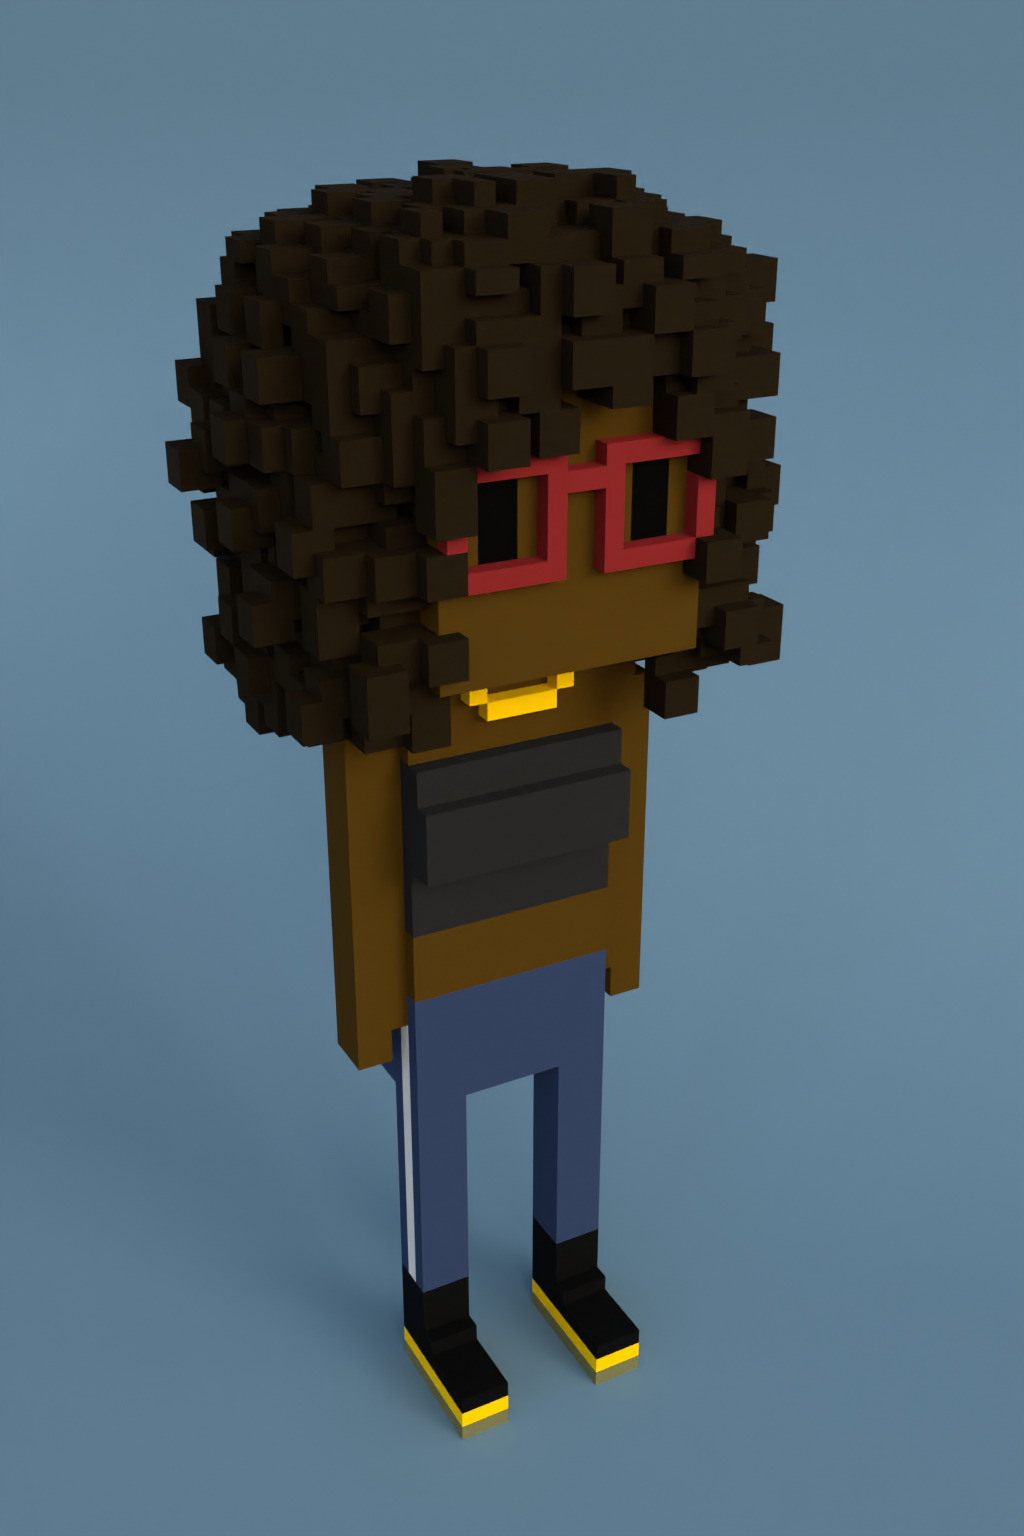

In [102]:
display(Image.open(requests.get('https://nftassets.covalenthq.com/c235e068a42eb9a1a4affa47907413fcc077545c35f511a76eb622d504749b4e.jpg', stream=True).raw))

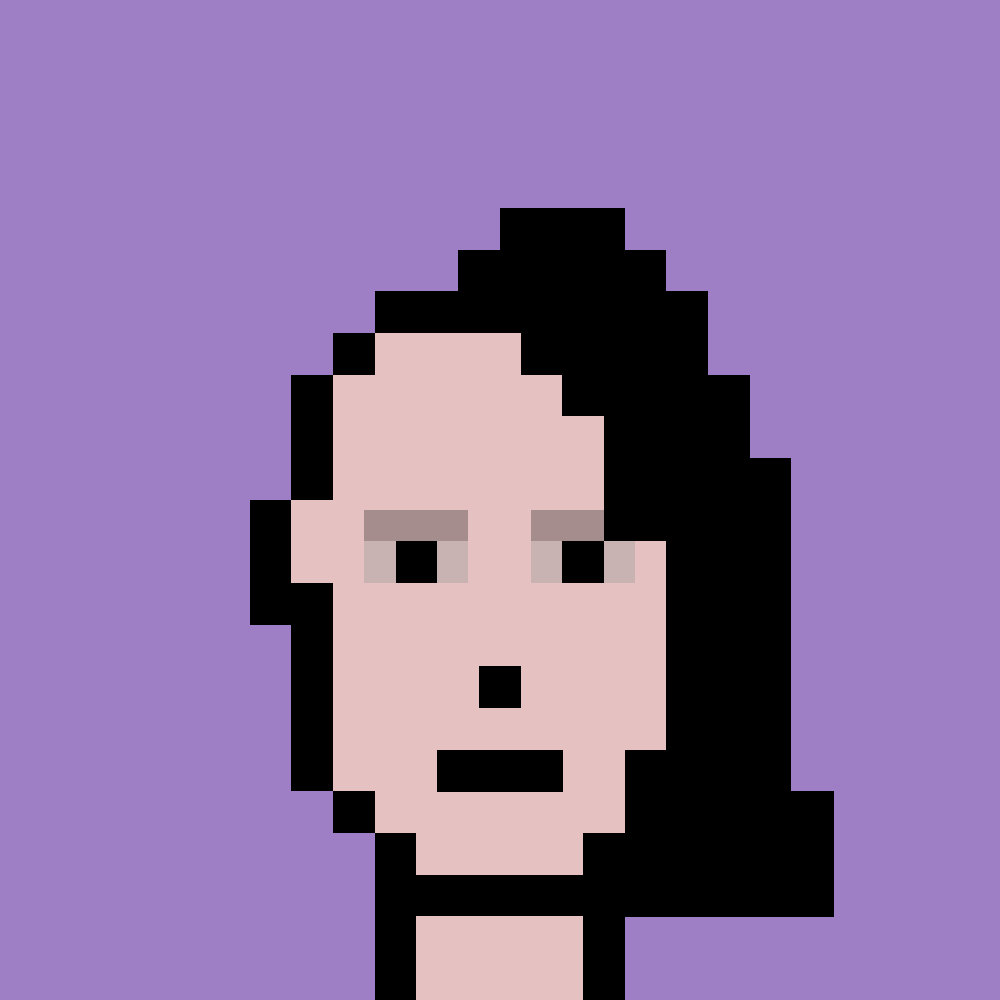

In [103]:
display(Image.open(requests.get('https://nftassets.covalenthq.com/cfae29e259f4e858de8673b462ab757729d615657f3e9f738bdfb306576351ed.png', stream=True).raw))

In [100]:
# test 1
response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
                {"role": "system", "content": "You are a digital artist specialized in abstract art and interested in web3 and NFT. You have "},
                {"role": "user", "content": "Given the objects with the following characteristics:\n\
                  Type: Human; Hair Style: Curly; Hair Color: Dark; Glasses: Nerdy; Glasses Color: Dark Red; Shirt: Tube Top; Shirt Color: Black; Pants: Trackpants; Pants Color: Denim; Shoes: Urban Boots; Necklace: Gold Necklace\n\
                  Type: Female; Hair: Half Shaved; Rarity Class: Rare; Lips: Black Lipstick\n\
                  Can you provide a description and motivation on the artwork you would like to create based on the above context? Please make it as concise as possible"},
            ]
        )
image_prompt = response['choices'][0]['message']['content']
image_prompt

'\n\nI would create an abstract piece featuring the two characters, side by side, with geometric patterns and vibrant, contrasting colors in the background. The nerdy glasses of the first character could be represented through square shapes, while the black lipstick of the second character could be represented through circular shapes. The half-shaved head of the second character could also incorporate triangular shapes. The gold necklace of the first character could be a prominent feature in the center of the artwork, with the rest of the elements branching out from there. The use of bold colors and shapes would create a dynamic and visually striking artwork that captures the unique characteristics of the two characters. The rarity class of the second character adds value and exclusivity to the piece, making it a desirable NFT.'

In [121]:
def auto_prompt_generation(nft_metadata, random_select=2):
    if random_select > 0:
        nft_metadata = random.sample(nft_metadata, random_select)
    
    selected_img_urls = [nf['nft_url'] for nf in nft_metadata]
    context_str = ""
    for nd in nft_metadata:
        #print("NFT url:", nd['nft_url'])
        nd_str = "===============\n"
        if nd["nft_description"] is not None and nd["nft_description"]:
            nd_str += f"Background: {nd['nft_description']}\n"
        if nd["nft_attributes"] is not None and nd["nft_attributes"]:
            nd_str += f"Attributes: {nd['nft_attributes']}\n"
        context_str += nd_str

    img_gen_prompt_str = f"Given the objects with the following context:\n {context_str}\nCan you provide a description on the artwork you would like to create and convery a message based on the above context? Please make it as concise as possible."
    print("Text Generation Prompt: ", img_gen_prompt_str)
    # call the chatGPT API
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {
                "role": "system",
                "content": "You are a digital artist specialized in abstract art and interested in web3 and NFT. You want to create your own unique artist style with a vision to inspire creativity and positivity with AI.",
            },
            {"role": "user", "content": img_gen_prompt_str},
        ],
        temperature=0.2,
    )
    image_prompt = response["choices"][0]["message"]["content"]
    return image_prompt, selected_img_urls

In [110]:
# test 2
image_prompt, selected_img_urls = auto_prompt_generation(nft_metadata, random_select=2)
image_prompt

Given the objects with the following context:
Background: BladeRunner Punks are the new generation of punk avatars. 10,000 futuristic dystopian PFPs newly constructed from scratch from over 100 traits, to a defined punk DNA rarity system. With a cool clean confident look, always forward facing and drawing eye-to-eye contact, they emanate strong identity and status.
Attributes: Type: Female; Hair: Half Shaved; Rarity Class: Rare; Lips: Black Lipstick
Attributes: Background: Aqua; Mouth: Angry; Species: Anglerfish; Outfit: Bullet Bandolier; Eyes: Crazy; Fin: Katana
                  Can you provide a description on the artwork you would like to create and convery a message based on the above context? Please make sure it as concise as possible


'I would like to create a digital artwork that merges the futuristic dystopian world of BladeRunner Punks with the mysterious and dangerous deep-sea realm of Anglerfish. The artwork will feature a female BladeRunner Punk with half-shaved hair and black lipstick wearing a bullet bandolier outfit, and an angry-mouthed Anglerfish with crazy eyes and a katana fin. The contrasting elements will reflect the idea of embracing uniqueness and standing out in a crowded world. The message of the artwork would be to inspire individuality, courage, and an empowered attitude towards self-expression regardless of the surrounding environment.'

In [123]:
# test 3
image_prompt, selected_img_urls = auto_prompt_generation(nft_metadata, random_select=3)
image_prompt

Text Generation Prompt:  Given the objects with the following context:
Attributes: Class: Poet; Origin: VALCORRUSS; Latent: F6CX; Genre: ioh; Breed: nazee; Polarity: qu; Age: 0.44; Ego: V; Rewrites: 0; Words: 0; Lexicon: 0
Background: Meebit #2293
Attributes: Type: Human; Hair Style: Curly; Hair Color: Dark; Glasses: Nerdy; Glasses Color: Dark Red; Shirt: Tube Top; Shirt Color: Black; Pants: Trackpants; Pants Color: Denim; Shoes: Urban Boots; Necklace: Gold Necklace
Attributes: Eyes: Spring; Hair: Nick Bowl Brown; Beard: Three-Day Brown; Clothes: Sleeveless Sweater; Skin: Dark Brown; Background: Grey

Can you provide a description on the artwork you would like to create and convery a message based on the above context? Please make it as concise as possible.


"I would like to create a digital abstract art piece that combines the elements of VALCORRUSS's poetic spirit with the diverse human representation of Meebit #2293 and the cool, casual outfit of the brown-skinned man in the third context. The artwork will showcase vibrant colors, flowing patterns, and awe-inspiring shapes that represent the infinite possibilities of creativity and the beauty of individuality. It aims to inspire viewers to embrace their unique attributes, appreciate diversity, and tap into their limitless creative potential. The use of AI in creating the artwork will symbolize the collaboration of human creativity and technology towards creating a better world."

In [124]:
selected_img_urls

['https://nftassets.covalenthq.com/ec3cd9bf140e1e9a8c2d982de0b4edcc156ff01a24321bb970ad377ea41134b8.png',
 'https://nftassets.covalenthq.com/c235e068a42eb9a1a4affa47907413fcc077545c35f511a76eb622d504749b4e.jpg',
 'https://nftassets.covalenthq.com/dbad9ee1fa7d7468f34b8d817aca5cb62c3138fac31ccbff9821b59d06fd7fa6.png']

# Image Generation

In [ ]:
prompt = "a cat on a couch"

# Generate image with DALL-E API
response = openai.Image.create(
    prompt=prompt,
    n=1,  # Number of images to generate
    size="256x256",
    response_format="url"
)

# Get image URL from response
image_url = response["data"][0]["url"]

# Load image from URL and display it
img = Image.open(requests.get(image_url, stream=True).raw)
img.show()

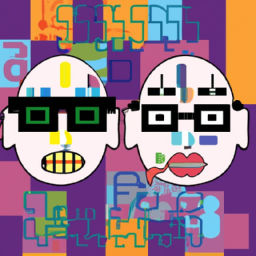

In [101]:
# Example 2
# Set up prompt for DALL-E API request
prompt = "I would create an abstract piece featuring the two characters, side by side, with geometric patterns and vibrant, contrasting colors in the background. The nerdy glasses of the first character could be represented through square shapes, while the black lipstick of the second character could be represented through circular shapes. The half-shaved head of the second character could also incorporate triangular shapes. The gold necklace of the first character could be a prominent feature in the center of the artwork, with the rest of the elements branching out from there. The use of bold colors and shapes would create a dynamic and visually striking artwork that captures the unique characteristics of the two characters. The rarity class of the second character adds value and exclusivity to the piece, making it a desirable NFT."

# Generate image with DALL-E API
response = openai.Image.create(
    prompt=prompt,
    n=1,  # Number of images to generate
    size="256x256",
    response_format="url"
)

# Get image URL from response
image_url = response["data"][0]["url"]

# Load image from URL and display it
img = Image.open(requests.get(image_url, stream=True).raw)
display(img)

In [115]:
def auto_mixer_image_generation(image_prompt):
    # Generate image with DALL-E API
    response = openai.Image.create(
        prompt=image_prompt,
        n=1,  # Number of images to generate
        size="256x256",
        response_format="url"
    )

    # Get image URL from response
    image_url = response["data"][0]["url"]

    # Load image from URL and display it
    img = Image.open(requests.get(image_url, stream=True).raw)
    return img

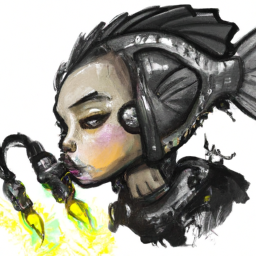

In [111]:
# Example 3
# Set up prompt for DALL-E API request
prompt = "I would like to create a digital artwork that merges the futuristic dystopian world of BladeRunner Punks with the mysterious and dangerous deep-sea realm of Anglerfish. The artwork will feature a female BladeRunner Punk with half-shaved hair and black lipstick wearing a bullet bandolier outfit, and an angry-mouthed Anglerfish with crazy eyes and a katana fin. The contrasting elements will reflect the idea of embracing uniqueness and standing out in a crowded world. The message of the artwork would be to inspire individuality, courage, and an empowered attitude towards self-expression regardless of the surrounding environment."
img = auto_mixer_image_generation(prompt)
display(img)

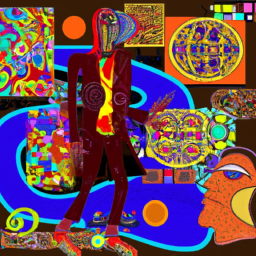

In [125]:
# Example 3
# Set up prompt for DALL-E API request
prompt = "I would like to create a digital abstract art piece that combines the elements of VALCORRUSS's poetic spirit with the diverse human representation of Meebit #2293 and the cool, casual outfit of the brown-skinned man in the third context. The artwork will showcase vibrant colors, flowing patterns, and awe-inspiring shapes that represent the infinite possibilities of creativity and the beauty of individuality. It aims to inspire viewers to embrace their unique attributes, appreciate diversity, and tap into their limitless creative potential. The use of AI in creating the artwork will symbolize the collaboration of human creativity and technology towards creating a better world."
img = auto_mixer_image_generation(prompt)
display(img)